In [2]:
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sobel_filtering(im):
    dx = ndimage.sobel(im, 0)  # horizontal derivative
    dy = ndimage.sobel(im, 1)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.max(mag)  # normalize (Q&D)
    return mag

In [4]:
def morf_operations(img_in,kernel):
    dilation = cv2.dilate(img_in,kernel,iterations = 1)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    erosion = cv2.erode(dilation,kernel,iterations = 1)
    return erosion

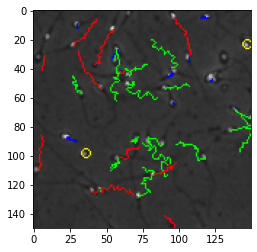

In [5]:
# Cargar imagen
video = imageio.mimread('1472 semen-00.avi')
video_sin_detecciones = imageio.mimread('1472 semen-00s.avi')

plt.imshow(video_sin_detecciones[0][0:150,0:150],cmap='gray')

In [33]:
# Deteccion img grises

# Paquetes a importar
import cv2
from scipy.signal.signaltools import wiener
from scipy import ndimage
import numpy as np


img_in = video[1]

greyscale = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY) # Convertir a grises
wfiltered_img = wiener(greyscale, (3,3))  # Filtro de wiener
sobel_img = sobel_filtering(wfiltered_img) # Sobel
sobel_img = np.array(sobel_img, dtype=np.uint8)
tresh,otsu = cv2.threshold(sobel_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
#apply_morf_op = morf_operations(otsu,kernel)
dilation = cv2.dilate(otsu,kernel,iterations = 1)
closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)
erosion = cv2.erode(closing,kernel,iterations = 1)

In [48]:
%matplotlib qt
# Probar con LOG

# Apply Gaussian Blur
img = np.zeros((11,11))
img[5,5] = 1
blur = cv2.GaussianBlur(img,(3,3),4)
#plt.imshow(blur,cmap='gray')

gaussian_blur = cv2.GaussianBlur(greyscale,(3,3),1.6)
plt.imshow(gaussian_blur,cmap='gray')
 
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(gaussian_blur,cv2.CV_64F)

# Le sumo el valor mas chico de la imagen para que no halla ningun pixel con valor negativo
laplacian2 = np.abs(np.min(laplacian)) + laplacian

#otsu
#norm_image = cv2.normalize(laplacian2, None, alpha = np.min(laplacian), beta = np.max(laplacian), norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8UC1)
laplacian2 = np.array(laplacian2, dtype=np.uint8)
tresh,otsu_log = cv2.threshold(laplacian2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#binarizar
binarized = 1.0 * (laplacian > -15)
img_binary = cv2.threshold(laplacian2, thresh, 255, cv2.THRESH_BINARY)


imagenes = [greyscale, wfiltered_img, gaussian_blur, laplacian, laplacian2, img_binary]
nombres = ['greyscale', 'filtro de wiener', 'gaussiano', 'laplaciano', 'laplacian2', 'img_binary']
for i in range(1,7):
    plt.subplot(2,3,i),plt.title(nombres[i-1]),plt.imshow(imagenes[i-1][0:150,0:150],cmap='gray')
    


NameError: name 'thresh' is not defined

In [43]:
# Probar adaptative tresholding

img=laplacian2
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3,cmap='gray')

In [35]:
# Construir histograma de imagen laplaciana

def histograma_pixeles (img):
    bins = np.zeros((np.max(img)-np.min(img)).astype(int)+1,dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = img[i,j]
            bins[(val + np.abs(np.min(img))).astype(int)] = bins[(val + np.abs(np.min(img))).astype(int)] + 1
    rango = np.arange(0, (np.max(img)-np.min(img)).astype(int)+1, 1) 
    return bins, rango

bins, rango = histograma_pixeles(laplacian)
plt.plot(rango,bins)

In [44]:
plt.bar(rango,bins)
print(bins)
print(bins[139])
print(139+np.min(laplacian))

[  1   1   0   0   1   1   0   0   1   1   3   0   1   4   0   1   2   2
   3   2   0   2   5   2   8   5   7   5   3   3   6   6   7   3  15   7
  11   9  12   8  15   9   7  13  15  19  18  18  24  25  23  33  30  32
  25  37  37  31  43  42  39  45  66  37  54  61  49  64  56  40  72  52
  67  61  76  72  76  85  92  77  81  95  87  87  93 103  94 110 111  95
 103 124 111 130 124 125 118 118 144 133 135 145 135 156 183 177 203 193
 182 164 224 236  36  78 184  92 194 229  58 236 190  78 158 169 142  88
 164 132  70  11 113 202  81 171 202  93 114 133 101  89 249 198  62   9
 173  57 208  73  98  33 195 145 135  81  76  60  42  30  26  14  15   4
   5   6   4   5   0   2   2   1   1   1   0   1   0   0   0   0   0   0
   1]
89
14.0


In [21]:
imagen = np.ones((10,10))
imagen[:,0] = 0
imagen[9,:] = 10
imagen[7:9,0:4] = 2

b, r= histograma_pixeles(imagen)
plt.subplot(121),plt.imshow(imagen,cmap='gray')
plt.subplot(122),plt.bar(r,b)
print(b)

[ 7 75  8  0  0  0  0  0  0  0 10]


In [22]:
print(laplacian.shape)

(580, 780)


In [23]:
histogram, bin_edges = np.histogram(laplacian, bins=256)
plt.plot(bin_edges[150:-2], histogram[150:-1])  # <- or here
plt.show()

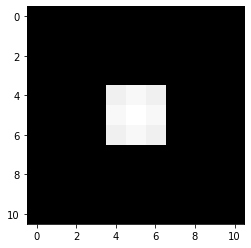

In [12]:
%matplotlib inline
plt.imshow(blur,cmap='gray')

In [61]:
# otsu con filtro gaussiano
blur = cv2.GaussianBlur(sobel_img,(5,5),0)
ret3,filtered_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
closing2 = cv2.morphologyEx(filtered_otsu, cv2.MORPH_CLOSE, kernel) 

In [39]:
# comparacion metodos sobel con log
imagenes = [greyscale, gaussian_blur, otsu]
nombres = ['greyscale', 'gaussian_blur', 'otsu']
for i in range(1,4):
    plt.subplot(1,3,i),plt.title(nombres[i-1]),plt.imshow(imagenes[i-1][0:150,0:150],cmap='gray')

In [8]:
%matplotlib qt

from scipy import ndimage
fill_holes = ndimage.morphology.binary_fill_holes(otsu).astype(int)

cosas = [greyscale, video_sin_detecciones[0], sobel_img, otsu, fill_holes]
names = ['greyscale', 'detecciones casa', 'sobel', 'otsu', 'fill_holes']

for i in range(1,7):
    plt.subplot(2,3,i),plt.title(names[i-1]),plt.imshow(cosas[i-1][0:150,0:150],cmap='gray')

IndexError: list index out of range

In [6]:
%matplotlib qt
cosas = [greyscale, sobel_img, otsu, fill_holes, filtered_otsu, closing2,video_sin_detecciones]
names = ['greyscale', 'sobel', 'otsu1', 'fill_holes', 'otsu2', 'closing2','casa']

for i in range(1,7):
    plt.subplot(2,3,i),plt.title(names[i-1]),plt.imshow(cosas[i-1][0:150,0:150],cmap='gray')    

NameError: name 'fill_holes' is not defined

In [17]:
plt.imsave('salida2.jpeg',apply_morf_op,cmap='gray')

In [18]:
%matplotlib qt
plt.imshow(apply_morf_op,cmap='gray')

In [ ]:
def gray_detection(img_in):
    greyscale = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY) # Convertir a grises
    wfiltered_img = wiener(greyscale, (3,3))  # Filtro de wiener
    sobel_img = sobel_filtering(wfiltered_img) # Sobel
    sobel_img = np.array(sobel_img, dtype=np.uint8)
    tresh,otsu = cv2.threshold(sobel_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    apply_morf_op = morf_operations(otsu,kernel)
return apply_morf_op

In [32]:
import sys
 
from ij import IJ
from ij import WindowManager

ModuleNotFoundError: No module named 'ij'